## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [2]:
import requests
try:
    response = requests.get(target_url)
    data = response.text
except:
    print("URL is not availiavle")    
else:
    print(" loading data sucessfully")
# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data = data.replace('\t', ',')
data[0:100]

784594


'n00015388_157,http://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238,http://farm2'

In [3]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = "\n"

data = data.split(split_tag)

#data = data.split('\t')
print(len(data))
data[0]

9996


'n00015388_157,http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [54]:
import pandas as pd
import io


df = pd.DataFrame(data)

df2 = df[0].str.split(",",1,True)
df2.columns = ['id', 'url']
df2.set_axis(['id', 'url'], axis='columns', inplace=True)
#df2.set_index(['id', 'url'])
#df2.set_index('id', inplace=True)
#df2.set_index('url', inplace=True)
#print(df2.iloc['url'])
df2.loc[0][1]

#df2.shape
#df2.loc['id', 'url']


'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


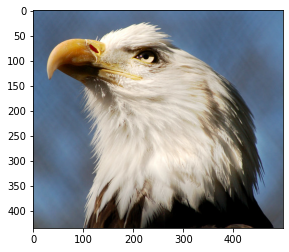

In [56]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df2.loc[0]['url']

print(first_link)
response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()





In [68]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for url in url_list:
        try:
            print(url)
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
          #  plt.imshow(img)
          #  plt.show()
            img_list.append(img)
        except:
            print("URL is not load sucess %s" % (url))
        else:
            print(" loading data sucessfully")    

    return img_list

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
 loading data sucessfully
http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
 loading data sucessfully
http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
 loading data sucessfully
http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
 loading data sucessfully
http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
URL is not load sucess http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
Total images that we got: 4 


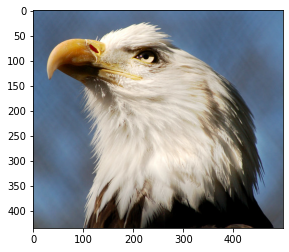

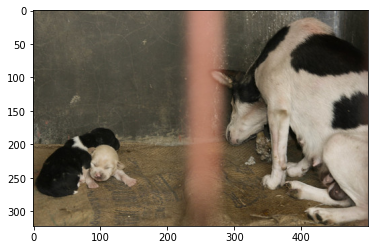

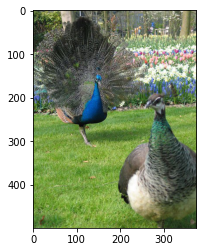

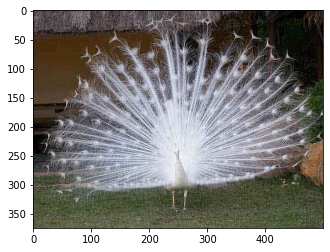

In [69]:
result = img2arr_fromURLs(df2[0:5]['url'].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

計算 哪一個國家人口最多 

In [70]:

d = {
    '國家':['China', 'India', 'United States', 'Indonesia', 'Brazil', 'Pakistan', 'Bangladesh', 'Nigeria', 'Russia', 'Janpen'] ,
    '人口':np.random.randint(100, 1700000000,size=10)
     }
df = pd.DataFrame(data=d)

result = df.groupby('人口')['國家'].min().tail(1)
print(result)

print(df[df['人口'] == df['人口'].max()])

人口
1643707018    Janpen
Name: 國家, dtype: object
       國家          人口
9  Janpen  1643707018
